### Importing the impportant libraris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("AIML Dataset.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# number of row and columns
data.shape

(6362620, 11)

In [8]:
#the information of the dataset or the metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
#the stastical description of
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
#the number of values on each class
data["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
#to check if there is null value
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#the percentage of fraud per all rows
round((data["isFraud"].value_counts()[1]/data.shape[0])*100,2)

np.float64(0.13)

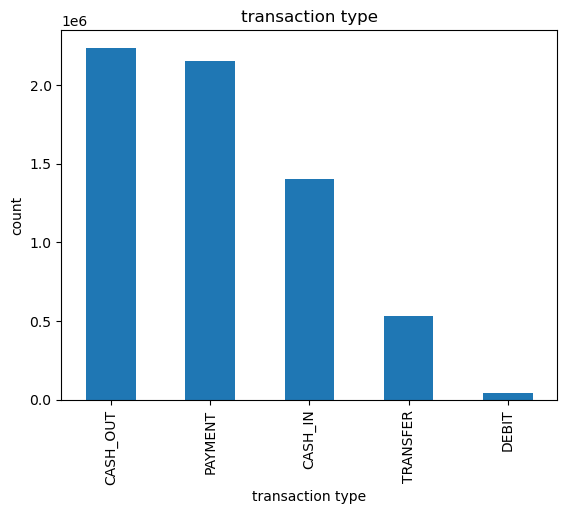

In [11]:
data["type"].value_counts().plot(kind="bar",title="transaction type")
plt.xlabel("transaction type")
plt.ylabel("count")
plt.show()

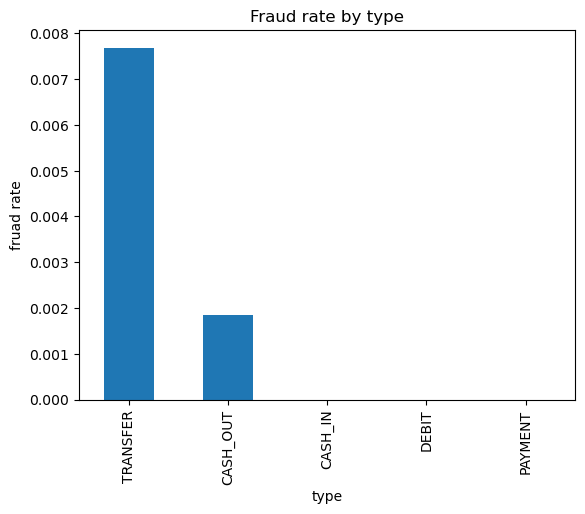

In [11]:
type_f = data.groupby("type")["isFraud"].mean().sort_values(ascending=False)
type_f.plot(kind="bar")
plt.title("Fraud rate by type")
plt.xlabel("type")
plt.ylabel("fruad rate")
plt.show()


In [12]:
data["amount"].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

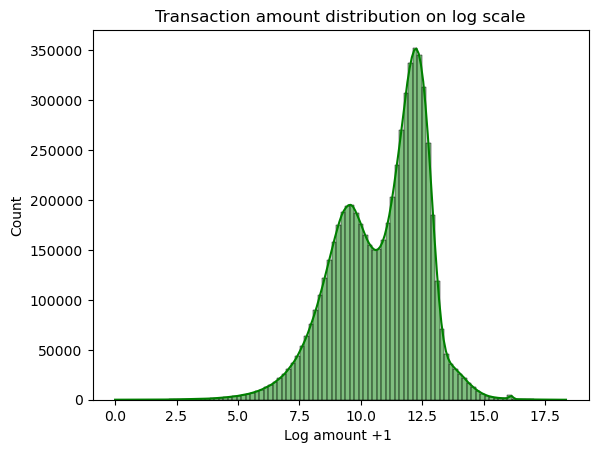

In [13]:
sns.histplot(np.log1p(data["amount"]),bins=100,kde=True,color='green')
plt.title("Transaction amount distribution on log scale")
plt.xlabel("Log amount +1 ")
plt.show()

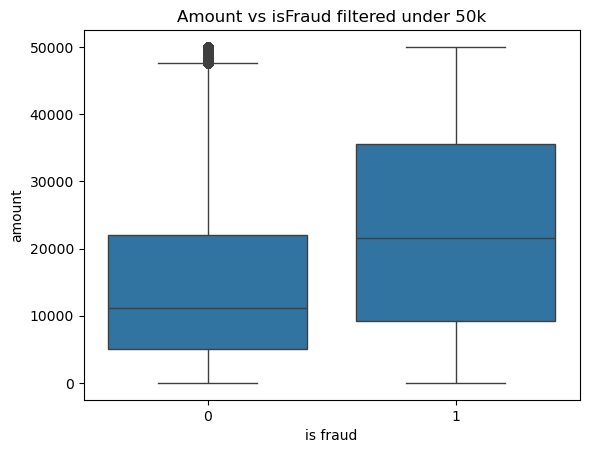

In [14]:
sns.boxplot(data = data[data["amount"]<50000],x = "isFraud",y="amount")
plt.title("Amount vs isFraud filtered under 50k")
plt.xlabel("is fraud")
plt.ylabel("amount")
plt.show()

In [15]:
#check balance difference
data["balanceDiffOrg"] = data["oldbalanceOrg"]-data["newbalanceOrig"]
data["balanceDiffDest"] = data["newbalanceDest"]-data["oldbalanceDest"]

In [16]:
(data["balanceDiffOrg"]<0).sum()

np.int64(1399253)

In [17]:
(data["balanceDiffDest"]<0).sum()

np.int64(1238864)

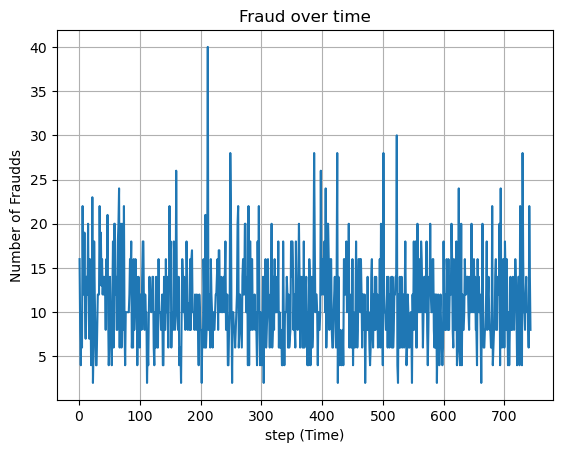

In [18]:
fraud_per_step = data[data["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index,fraud_per_step.values,label = "Fraud per step")
plt.xlabel("step (Time)")
plt.ylabel("Number of Fraudds")
plt.title("Fraud over time")
plt.grid(True)
plt.show()

In [20]:
data.drop(columns="step",inplace = True)

In [21]:
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [22]:
#top senders
top_senders = data['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [23]:
#top receivers
top_receivers = data["nameDest"].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [25]:
#fraud users
fraud_users = data[data["isFraud"]==1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [33]:
#fraud type
fraud_types = data[data["type"].isin(["TRANSFER","CASH_OUT"])]
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [29]:
corr = data[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()


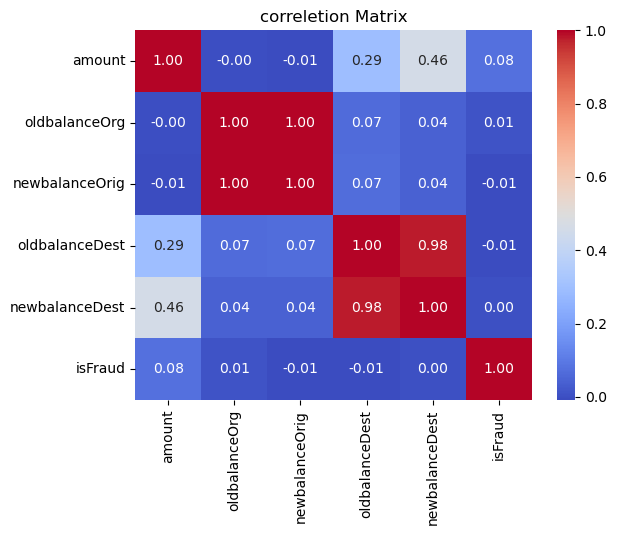

In [31]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correletion Matrix")
plt.show()

In [32]:
zero_after_transfer = data[
    (data["oldbalanceOrg"]>0) &
    (data["newbalanceOrig"]==0) &
    (data["type"].isin(["TRANSFER","CASH_OUT"]))
    ]
len(zero_after_transfer)

228662

#### Feature engineering and training model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [22]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
data = data.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [27]:
data_model = data.copy()
categorial = ["type"]
numerical = ["amount","oldbalanceOrg","oldbalanceDest","newbalanceDest","balanceDiffDest"]

In [28]:
X = data_model.drop("isFraud",axis=1)
y= data_model["isFraud"]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [32]:
preprocessor = ColumnTransformer(transformers=[
    ("num",StandardScaler(),numerical),
    ("cat",OneHotEncoder(drop='first'),categorial)
                               
 ],
    remainder = 'drop'
)



In [35]:
pipeline = Pipeline(
    [
        ("prep",preprocessor),
        ("clas",LogisticRegression(class_weight="balanced",max_iter=1000))
    ]
)

In [36]:
# fit model
pipeline.fit(X_train,y_train)

,steps,"[('prep', ...), ('clas', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [44]:
y_prediction = pipeline.predict(X_test)

In [45]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1906322
           1       0.02      0.92      0.03      2464

    accuracy                           0.93   1908786
   macro avg       0.51      0.92      0.50   1908786
weighted avg       1.00      0.93      0.96   1908786



In [52]:
#confusion matrix
cm=confusion_matrix(y_test,y_prediction)
print(cm)

[[1772693  133629]
 [    198    2266]]


### TP,TN,FP,FN

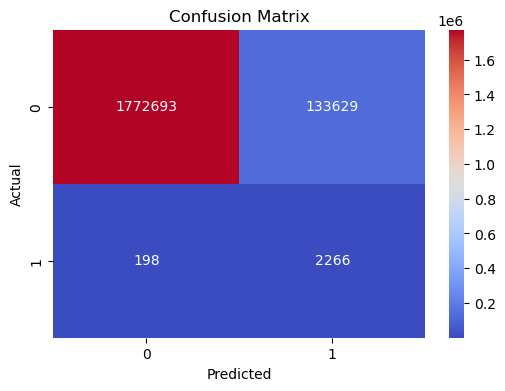

In [53]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# accuracy
pipeline.score(X_test,y_test)*100

92.9888945120092

In [49]:
#save the model
import joblib
joblib.dump(pipeline,"fraud_detection_model.pkl")
print("model saved successfully!")

model saved successfully!
